# Setting notebook and connecting data
### Importing all neccessary packages

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import os
import json

# Packages for data vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Packages for Clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Connecting all files 

In [4]:
# Main Tables 
housing_prices_2005_2023 = pd.read_excel("DATA/Housing_Prices_Main_Table.xlsx")
stockholm_price_2020_2024 = pd.read_excel("DATA/Stockholm_Price_Recent_Region_2020_2024.xlsx")

intrest_rate_1991_2023 = pd.read_excel("DATA/CSV/Intrest_Rate_1991_2023.xlsx")
inflation_2005_2023 = pd.read_csv("DATA/CSV/Inflation_Sweden_2005_2023_month.csv")
gdp_sweden_2005_2023 = pd.read_csv("DATA/CSV/GDP_Sweden_2005_2023.csv")
citizens_by_regso_2010_2023 = pd.read_csv("DATA/CSV/Citizens_by_RegSO_2010_2023.csv", encoding='latin-1')

# Socioeconomic Tables
mean_income_2011_2022 = pd.read_csv("DATA/CSV/Mean_Income_2011_2022.csv", encoding='latin-1')
unemployment_2007_2021 = pd.read_csv("DATA/CSV/Unemployment_percent_2007_2021.csv", encoding='latin-1')
education_2015_2023 = pd.read_csv("DATA/CSV/Education_2015_2023.csv", encoding='latin-1')
buildings_new_2010_2023 = pd.read_csv("DATA/CSV/Buildings_New_2010_2023.csv", encoding='latin-1')

#Built Environmet Table
built_environmet = pd.read_excel("DATA/From_OSM/BuildEnvironmentData.xlsx")

# Codes to connect tables 
deso_regso_codes = pd.read_excel("DATA/Codes/DeSO_RegSO_codes.xlsx")

#GDP_Sweden_2005_2023.head()

# Data Cleaning
## Clean all tables from unnecessary tiltes, clear (translate) columns' names

1.Creating mean value for interest rate for each year from 2005-2023

In [5]:
# Convert the date column to datetime format
intrest_rate_1991_2023['Styrräntans utveckling'] = pd.to_datetime(intrest_rate_1991_2023['Styrräntans utveckling'])

# Extract the year from the date column
intrest_rate_1991_2023['Year'] = intrest_rate_1991_2023['Styrräntans utveckling'].dt.year
# Group by the year and calculate the mean interest rate
yearly_interest_rate = intrest_rate_1991_2023.groupby('Year')['Procent'].mean().reset_index()
# Filter the dataframe for the years 2005-2023
intrest_rate_2005_2023 = yearly_interest_rate.query('2005 <= Year <= 2023')

#Extract only rates for 2020 -2024
intrest_rate_1991_2023[(intrest_rate_1991_2023['Styrräntans utveckling'].dt.year >= 2020) & 
                                       (intrest_rate_1991_2023['Styrräntans utveckling'].dt.year <= 2024)]
# Extract the month from the date column
intrest_rate_1991_2023['month'] = intrest_rate_1991_2023['Styrräntans utveckling'].dt.to_period('M').astype(str)
#Group by the month adn calculate the mean interest rate
monthly_interest_rate = intrest_rate_1991_2023.groupby('month')['Procent'].mean().reset_index()

# Print the result
print(intrest_rate_2005_2023)
print(monthly_interest_rate)
monthly_interest_rate.to_csv('monthly_interest_rate.csv')

    Year   Procent
6   2005  1.732692
7   2006  2.224038
8   2007  3.473180
9   2008  4.080153
10  2009  0.635057
11  2010  0.519157
12  2011  1.761538
13  2012  1.442529
14  2013  0.989464
15  2014  0.455939
16  2015 -0.257663
17  2016 -0.483333
18  2017 -0.500000
19  2018 -0.492337
20  2019 -0.241379
21  2020  0.000000
22  2021  0.000000
23  2022  0.786538
24  2023  3.484615
       month   Procent
0    1999-01  3.400000
1    1999-02  3.262500
2    1999-03  3.095652
3    1999-04  2.900000
4    1999-05  2.900000
..       ...       ...
301  2024-02  4.000000
302  2024-03  4.000000
303  2024-04  4.000000
304  2024-05  3.804348
305  2024-06  3.750000

[306 rows x 2 columns]


2. Create Average value for Inflation for each year

In [6]:
# Melt the dataframe to convert columns into rows
inflation_2005_2023_melted = inflation_2005_2023.melt(id_vars=['Unnamed: 0'], var_name='Date', value_name='Inflation')

# Extract the year from the 'Date' column and convert to integer
inflation_2005_2023_melted['Year'] = inflation_2005_2023_melted['Date'].str[:4].astype(int)

# Filter the dataframe for the years 2005-2023
filtered_data = inflation_2005_2023_melted[(inflation_2005_2023_melted['Year'] <= 2023)]

# Group by the year and calculate the average inflation rate
yearly_inflation = filtered_data.groupby('Year')['Inflation'].mean().reset_index()

# Print the result
print(yearly_inflation)

    Year  Inflation
0   2005   0.458333
1   2006   1.358333
2   2007   2.225000
3   2008   3.441667
4   2009  -0.491667
5   2010   1.150000
6   2011   2.958333
7   2012   0.883333
8   2013  -0.050000
9   2014  -0.183333
10  2015  -0.025000
11  2016   0.983333
12  2017   1.791667
13  2018   1.958333
14  2019   1.800000
15  2020   0.491667
16  2021   2.166667
17  2022   8.350000
18  2023   8.650000


3. Pivot table and clear names

In [7]:
# Melt the dataframe to convert columns into rows
gdp_melted = gdp_sweden_2005_2023.melt(id_vars=['sektor','transaktionspost'], var_name='Date', value_name='GDP')

# Extract the year from the 'Date' column and convert to integer
gdp_melted['Year'] = gdp_melted['Date'].str[:4].astype(int)

# Group by the year and calculate the average GDP
yearly_gdp = gdp_melted.groupby('Year')['GDP'].mean().reset_index()

print(yearly_gdp)

    Year        GDP
0   2005  2927141.0
1   2006  3117514.0
2   2007  3312151.0
3   2008  3391889.0
4   2009  3324151.0
5   2010  3551531.0
6   2011  3704835.0
7   2012  3724512.0
8   2013  3804994.0
9   2014  3963683.0
10  2015  4231745.0
11  2016  4402732.0
12  2017  4582907.0
13  2018  4792294.0
14  2019  5033443.0
15  2020  5020978.0
16  2021  5464876.0
17  2022  5865211.0
18  2023  6206034.0


4. Clear name of region from 'Stockholm' and get rid off unnecessary columns, make year and separate column, chane RegSo (region) name to name of area from Main_Price_Table

Number of Habitants Table

In [8]:
# Extract the name within parentheses
citizens_by_regso_2010_2023['region'] = citizens_by_regso_2010_2023['region'].str.extract(r'\((.*?)\)', expand=False)

# Drop columns 
citizens_by_regso_2010_2023 = citizens_by_regso_2010_2023.drop(columns=['ålder', 'kön'])

# Melt the dataframe to convert columns into rows
citizens_melted = citizens_by_regso_2010_2023.melt(id_vars=['region'], var_name='year', value_name='#Habitants')

# Merge to map 'region' to 'Name'
citizens_melted = pd.merge(citizens_melted, deso_regso_codes[['Name_full', 'Name']], left_on='region', right_on='Name_full', how='left')

# Replace 'region' column with 'Name'
citizens_melted['region'] = citizens_melted['Name']

# Drop 'Name_full' and 'Name' columns
citizens_melted.drop(['Name_full', 'Name'], axis=1, inplace=True)

#Remove duplicates
citizens_melted = citizens_melted.drop_duplicates(subset=['region', '#Habitants', 'year'])

# Group by the year,region and calculate sum of Habitants
citizens_sum = citizens_melted.groupby(['year','region'])['#Habitants'].sum().reset_index()

print(citizens_sum)

#Creatign .xlsx file to check if the sum corresponds with main file 
#Citizens_Sum.to_excel('Citizens_Sum_2.xlsx')

     year                 region  #Habitants
0    2010       Bromma-Västerled       65706
1    2010  Brännkyrka-Skärholmen       78238
2    2010      Enskede-Skarpnäck       89697
3    2010               Essingen        8968
4    2010          Farsta-Vantör       89785
..    ...                    ...         ...
163  2023            Kungsholmen       61888
164  2023           Spånga-Kista       93039
165  2023              Södermalm      127947
166  2023      Vasastan-Norrmalm       75231
167  2023              Östermalm       83551

[168 rows x 3 columns]


Income Table

In [9]:
# Extract the name within parentheses
mean_income_2011_2022['region'] = mean_income_2011_2022['region'].str.extract(r'\((.*?)\)', expand=False)

# Drop columns 
mean_income_2011_2022 = mean_income_2011_2022.drop(columns=['inkomstkomponent', 'kön'])

# Melt the dataframe to convert columns into rows
income_melted = mean_income_2011_2022.melt(id_vars=['region'], var_name='year', value_name='Income')

# Merge to map 'region' to 'Name'
income_melted = pd.merge(income_melted, deso_regso_codes[['Name_full', 'Name']], left_on='region', right_on='Name_full', how='left')

# Replace 'region' column with 'Name'
income_melted['region'] = income_melted['Name']

# Drop 'Name_full' and 'Name' columns
income_melted.drop(['Name_full', 'Name'], axis=1, inplace=True)

#Remove duplicates
income_melted = income_melted.drop_duplicates(subset=['region', 'Income', 'year'])

#Multiply Income by 100000 because original data was in thousands
income_melted['Income'] = income_melted['Income'] * 1000

# Group by the year,region and calculate Mean of Income
income_sum = income_melted.groupby(['year','region'])['Income'].mean().reset_index()

print(income_sum)


     year                 region         Income
0    2011       Bromma-Västerled  427172.727273
1    2011  Brännkyrka-Skärholmen  289807.142857
2    2011      Enskede-Skarpnäck  302516.666667
3    2011               Essingen  384250.000000
4    2011          Farsta-Vantör  262733.333333
..    ...                    ...            ...
139  2022            Kungsholmen  469383.333333
140  2022           Spånga-Kista  300822.222222
141  2022              Södermalm  424972.727273
142  2022      Vasastan-Norrmalm  555344.444444
143  2022              Östermalm  820937.500000

[144 rows x 3 columns]


Unemployment Table

In [10]:
# Extract the name within parentheses
unemployment_2007_2021['region'] = unemployment_2007_2021['region'].str.extract(r'\((.*?)\)', expand=False)

# Drop columns 
unemployment_2007_2021 = unemployment_2007_2021.drop(columns=['bakgrundsvariabel', 'kön'])

# Melt the dataframe to convert columns into rows
unemployment_melted = unemployment_2007_2021.melt(id_vars=['region'], var_name='year', value_name='Unemployment')

# Merge to map 'region' to 'Name'
unemployment_melted = pd.merge(unemployment_melted, deso_regso_codes[['Name_full', 'Name']], left_on='region', right_on='Name_full', how='left')

# Replace 'region' column with 'Name'
unemployment_melted['region'] = unemployment_melted['Name']

# Drop 'Name_full' and 'Name' columns
unemployment_melted.drop(['Name_full', 'Name'], axis=1, inplace=True)

#Remove duplicates
unemployment_melted = unemployment_melted.drop_duplicates(subset=['region', 'Unemployment', 'year'])

# Group by the year,region and calculate Mean Unemployment Rate
unemployment_mean = unemployment_melted.groupby(['year','region'])['Unemployment'].mean().reset_index()

print(unemployment_mean)

     year                 region  Unemployment
0    2007       Bromma-Västerled      6.694444
1    2007  Brännkyrka-Skärholmen     11.264286
2    2007      Enskede-Skarpnäck     10.136364
3    2007               Essingen      7.350000
4    2007          Farsta-Vantör     12.640000
..    ...                    ...           ...
175  2021            Kungsholmen      8.380000
176  2021           Spånga-Kista     20.022222
177  2021              Södermalm      9.700000
178  2021      Vasastan-Norrmalm      8.342857
179  2021              Östermalm      6.575000

[180 rows x 3 columns]


Education Table

In [11]:
# Extract the name within parentheses
education_2015_2023['region'] = education_2015_2023['region'].str.extract(r'\((.*?)\)', expand=False)

# Drop columns 
education_2015_2023 = education_2015_2023.drop(columns=['utbildningsnivå'])

# Melt the dataframe to convert columns into rows
education_melted = education_2015_2023.melt(id_vars=['region'], var_name='year', value_name='Education')

# Merge to map 'region' to 'Name'
education_melted = pd.merge(education_melted, deso_regso_codes[['Name_full', 'Name']], left_on='region', right_on='Name_full', how='left')

# Replace 'region' column with 'Name'
education_melted['region'] = education_melted['Name']

# Drop 'Name_full' and 'Name' columns
education_melted.drop(['Name_full', 'Name'], axis=1, inplace=True)

#Remove duplicates
education_melted = education_melted.drop_duplicates(subset=['region', 'Education', 'year'])

# Group by the year,region and calculate Mean Unemployment Rate
education_sum = education_melted.groupby(['year','region'])['Education'].sum().reset_index()

print(education_sum)

     year                 region  Education
0    2015       Bromma-Västerled      26345
1    2015  Brännkyrka-Skärholmen      20378
2    2015      Enskede-Skarpnäck      32453
3    2015               Essingen       3946
4    2015          Farsta-Vantör      24553
..    ...                    ...        ...
103  2023            Kungsholmen      29040
104  2023           Spånga-Kista      19239
105  2023              Södermalm      53606
106  2023      Vasastan-Norrmalm      33887
107  2023              Östermalm      34738

[108 rows x 3 columns]


New Apartments

In [12]:
# Drop columns 
buildings_new_2010_2023 = buildings_new_2010_2023.drop(columns=['byggår'])

# Replace ".." with 0 in the entire dataframe
buildings_new_2010_2023 = buildings_new_2010_2023.replace('..', 0)

# Melt the dataframe to convert columns into rows
buildings_melted = buildings_new_2010_2023.melt(id_vars=['region'], var_name='year', value_name='Apartments')

# Merge to map 'region' to 'DeSO code'
buildings_melted = pd.merge(buildings_melted, deso_regso_codes[['DeSO', 'Name']], left_on='region', right_on='DeSO', how='left')

# Replace 'region' column with 'Name'
buildings_melted['region'] = buildings_melted['Name']

# Drop 'DeSO','Name' columns
buildings_melted.drop(['DeSO','Name'], axis=1, inplace=True)

# Convert 'Apartments' column from string to integer
buildings_melted['Apartments'] = buildings_melted['Apartments'].astype(int)

#Remove duplicates
buildings_melted = buildings_melted.drop_duplicates(subset=['region', 'Apartments', 'year'])

# Group by the year,region and calculate Mean Unemployment Rate
buildings_sum = buildings_melted.groupby(['year','region'])['Apartments'].sum().reset_index()

print(buildings_sum)

     year                 region  Apartments
0    2010       Bromma-Västerled         270
1    2010  Brännkyrka-Skärholmen         235
2    2010      Enskede-Skarpnäck         136
3    2010               Essingen          31
4    2010          Farsta-Vantör          96
..    ...                    ...         ...
163  2023            Kungsholmen          36
164  2023           Spånga-Kista         490
165  2023              Södermalm         200
166  2023      Vasastan-Norrmalm          34
167  2023              Östermalm         118

[168 rows x 3 columns]


# Conneting all tables 
### Filter out only necessary columns

In [13]:
# Merging table with data for Sweden
sweden_data = pd.merge(intrest_rate_2005_2023, yearly_inflation, on ='Year', how='inner')
sweden_data = pd.merge(sweden_data, yearly_gdp, on ='Year', how='inner')

# Changing 'Year' to 'year' to match with Stockholm df
sweden_data = sweden_data.rename(columns={'Year': 'year'})
# Changing year data type to match with Stockhom df
sweden_data['year'] = sweden_data['year'].astype(str)
print(sweden_data)

#Export table to .csv
sweden_data.to_csv('sweden_data.csv')

    year   Procent  Inflation        GDP
0   2005  1.732692   0.458333  2927141.0
1   2006  2.224038   1.358333  3117514.0
2   2007  3.473180   2.225000  3312151.0
3   2008  4.080153   3.441667  3391889.0
4   2009  0.635057  -0.491667  3324151.0
5   2010  0.519157   1.150000  3551531.0
6   2011  1.761538   2.958333  3704835.0
7   2012  1.442529   0.883333  3724512.0
8   2013  0.989464  -0.050000  3804994.0
9   2014  0.455939  -0.183333  3963683.0
10  2015 -0.257663  -0.025000  4231745.0
11  2016 -0.483333   0.983333  4402732.0
12  2017 -0.500000   1.791667  4582907.0
13  2018 -0.492337   1.958333  4792294.0
14  2019 -0.241379   1.800000  5033443.0
15  2020  0.000000   0.491667  5020978.0
16  2021  0.000000   2.166667  5464876.0
17  2022  0.786538   8.350000  5865211.0
18  2023  3.484615   8.650000  6206034.0


In [14]:
# changing 'year' column to string data type, as it was object and merge didn't work properly
# List of DataFrames
dataframes = [housing_prices_2005_2023,citizens_sum, income_sum, unemployment_mean, education_sum, buildings_sum]

# Convert 'year' column to string for each DataFrame
for df in dataframes:
    if 'year' in df.columns:  # Check if 'year' column exists in the DataFrame
        df['year'] = df['year'].astype(str)

In [15]:
# Merging tables with data for Stockholm 

stockholm_data = pd.merge(housing_prices_2005_2023, citizens_sum, on=['region','year'], how='left')\
.merge(income_sum, on=['region','year'], how='left')\
.merge(unemployment_mean, on=['region','year'], how='left')\
.merge(education_sum, on=['region','year'], how='left')\
.merge(buildings_sum, on=['region','year'], how='left')

print(stockholm_data)

                    region  year   Price  #Habitants         Income  \
0    Brännkyrka-Skärholmen  2005   15536         NaN            NaN   
1    Brännkyrka-Skärholmen  2006   18664         NaN            NaN   
2    Brännkyrka-Skärholmen  2007   22862         NaN            NaN   
3    Brännkyrka-Skärholmen  2008   21333         NaN            NaN   
4    Brännkyrka-Skärholmen  2009   22595         NaN            NaN   
..                     ...   ...     ...         ...            ...   
223      Vasastan-Norrmalm  2019   95579     73653.0  529544.444444   
224      Vasastan-Norrmalm  2020  102700     74061.0  528422.222222   
225      Vasastan-Norrmalm  2021  113836     74119.0  616033.333333   
226      Vasastan-Norrmalm  2022  116557     74327.0  555344.444444   
227      Vasastan-Norrmalm  2023  112071     75231.0            NaN   

     Unemployment  Education  Apartments  
0             NaN        NaN         NaN  
1             NaN        NaN         NaN  
2       11.264286 

In [16]:
# Replace the string "NaN" with actual np.nan
stockholm_data.replace("NaN", np.nan, inplace=True)
print(stockholm_data.isnull().sum())

region            0
year              0
Price             0
#Habitants       60
Income           84
Unemployment     48
Education       120
Apartments       60
dtype: int64


<Axes: >

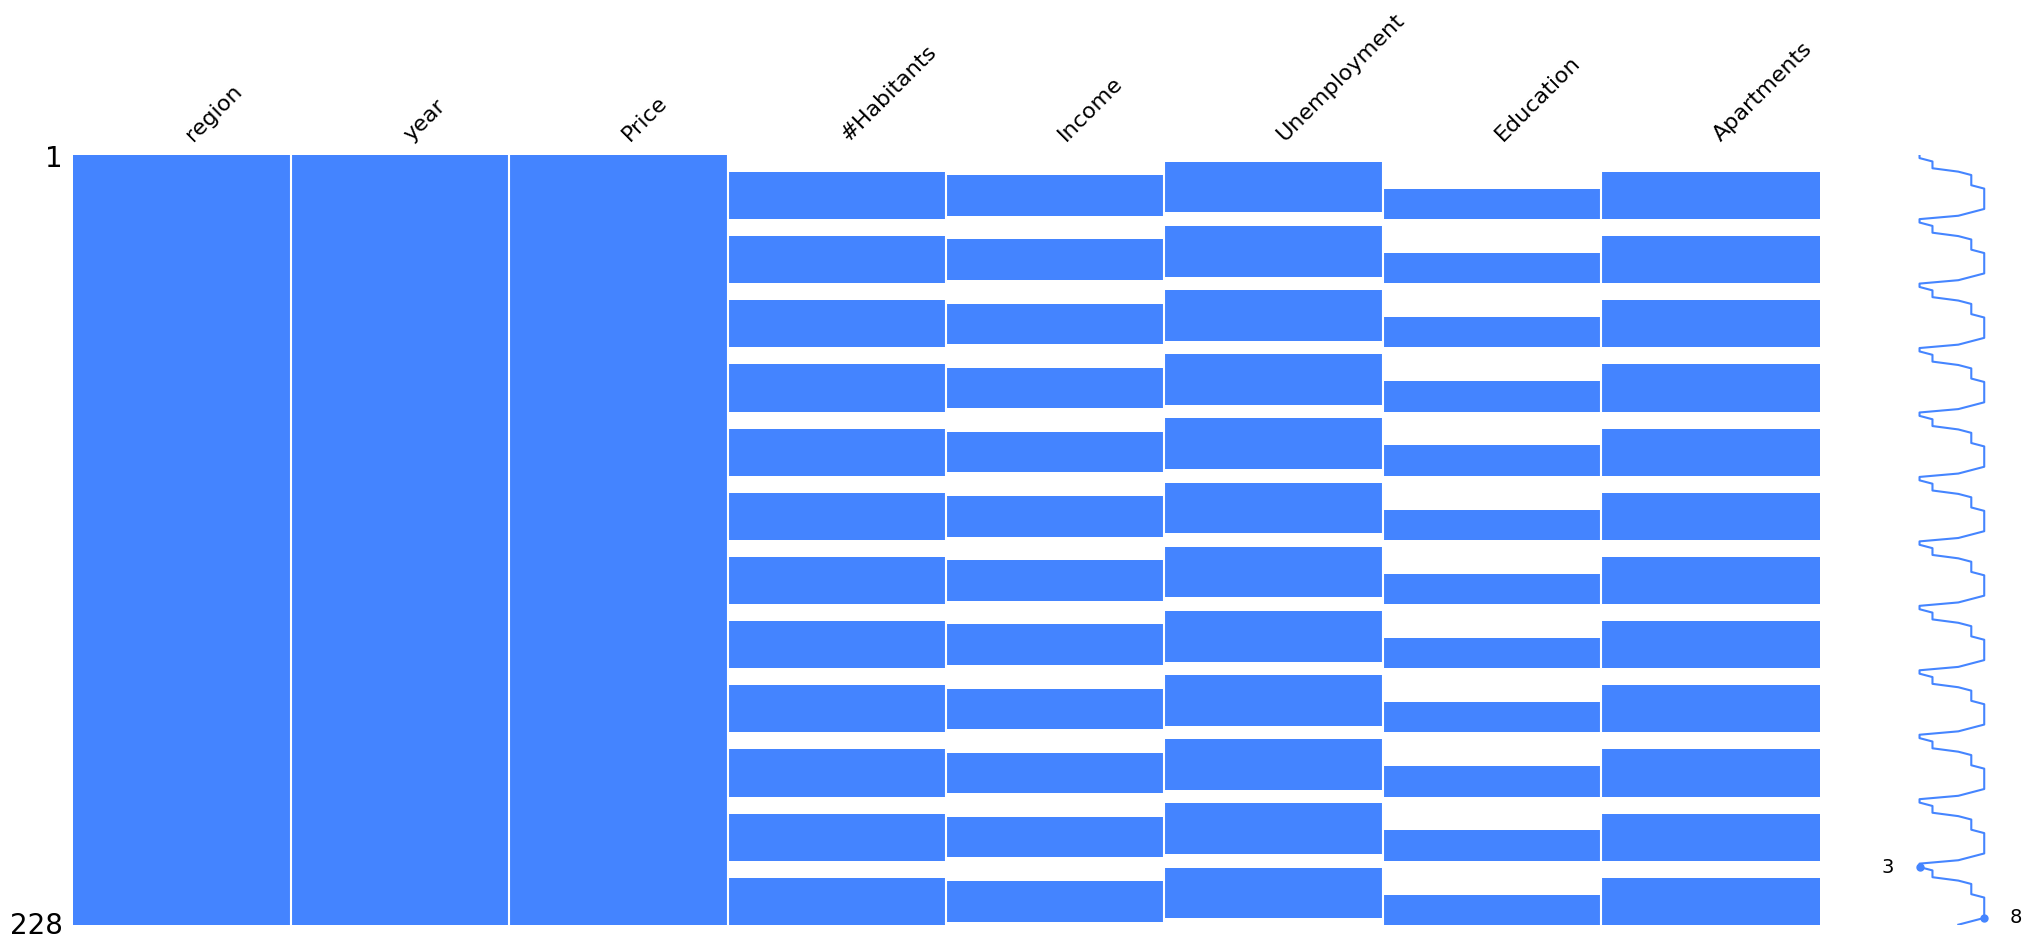

In [17]:
import missingno as msno
# Visualize missing data
msno.matrix(stockholm_data, color=(0.27, 0.52, 1.0))

# Data Exploration & Analysis
## Analyze data, correlation between variables, creating charts

Calculating Affordability Index (Price/Median Income)

In [18]:

stockholm_data['Affordability_Index'] = stockholm_data['Price']/stockholm_data['Income']
print(stockholm_data)

#Export table to .csv
stockholm_data.to_csv('Stockholm_data.csv')

                    region  year   Price  #Habitants         Income  \
0    Brännkyrka-Skärholmen  2005   15536         NaN            NaN   
1    Brännkyrka-Skärholmen  2006   18664         NaN            NaN   
2    Brännkyrka-Skärholmen  2007   22862         NaN            NaN   
3    Brännkyrka-Skärholmen  2008   21333         NaN            NaN   
4    Brännkyrka-Skärholmen  2009   22595         NaN            NaN   
..                     ...   ...     ...         ...            ...   
223      Vasastan-Norrmalm  2019   95579     73653.0  529544.444444   
224      Vasastan-Norrmalm  2020  102700     74061.0  528422.222222   
225      Vasastan-Norrmalm  2021  113836     74119.0  616033.333333   
226      Vasastan-Norrmalm  2022  116557     74327.0  555344.444444   
227      Vasastan-Norrmalm  2023  112071     75231.0            NaN   

     Unemployment  Education  Apartments  Affordability_Index  
0             NaN        NaN         NaN                  NaN  
1             NaN  

Checking corellation between Price, Interest Rate, Inflation, GDP

In [19]:
# Merge the DataFrames on 'year'
merge_sweden = pd.merge(stockholm_data, sweden_data, on='year')

# Calculate the correlation matrix
correlation_sweden = merge_sweden[['Price', 'Procent', 'Inflation', 'GDP']].corr()

# Display the correlation matrix
print(correlation_sweden)

              Price   Procent  Inflation       GDP
Price      1.000000 -0.334228   0.271916  0.610491
Procent   -0.334228  1.000000   0.413939 -0.287081
Inflation  0.271916  0.413939   1.000000  0.639198
GDP        0.610491 -0.287081   0.639198  1.000000


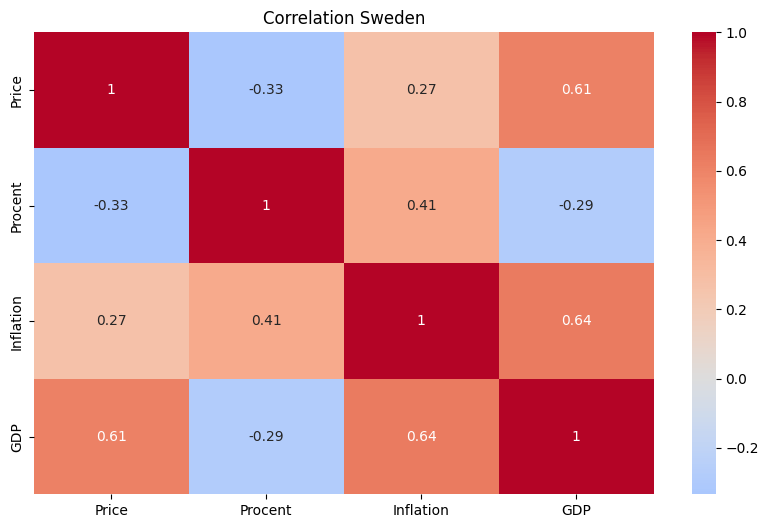

In [20]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_sweden, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Sweden')
plt.show()

Checking corellation between Price, Income, Unemployment, Education, Apartments

In [21]:
# Calculate the correlation matrix
correlation_stockholm = stockholm_data[['Price', 'Income', 'Unemployment', 'Education', 'Apartments']].corr()

# Display the correlation matrix
print(correlation_stockholm)

                 Price    Income  Unemployment  Education  Apartments
Price         1.000000  0.784257     -0.613165   0.361339   -0.445680
Income        0.784257  1.000000     -0.747846   0.173028   -0.232403
Unemployment -0.613165 -0.747846      1.000000  -0.262086    0.491537
Education     0.361339  0.173028     -0.262086   1.000000    0.073794
Apartments   -0.445680 -0.232403      0.491537   0.073794    1.000000


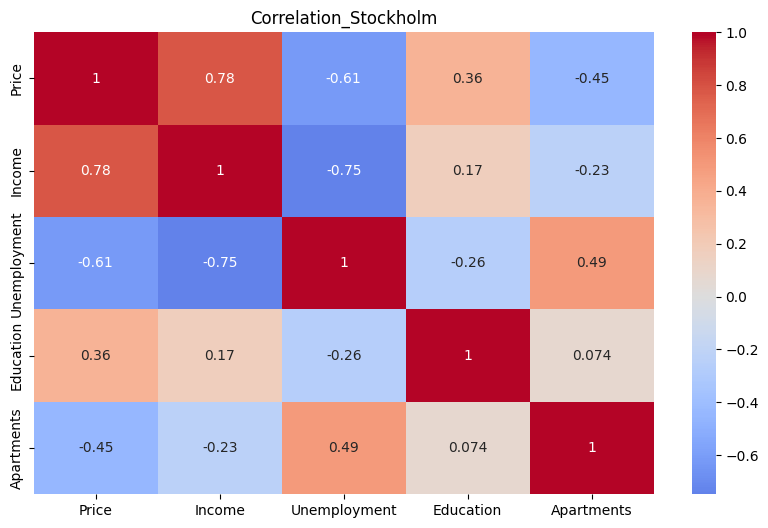

In [22]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_stockholm, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation_Stockholm')
plt.show()

Checking corellation between Price(latest year 2023), Green Spaces, # of Schools, # of Transportation nodes

In [23]:

# Calculate the correlation matrix
correlation_build = built_environmet[['Price_2023', 'Green_Spaces_%', '#Schools', '#Transportation']].corr()

# Display the correlation matrix
print(correlation_build)

# Convert the correlation matrix to a long format
correlation_build_long = correlation_build.reset_index().melt(id_vars='index', var_name='Variable', value_name='Correlation')

# Rename the 'index' column to 'Variable_1'
correlation_build_long.rename(columns={'index': 'Variable_1'}, inplace=True)
print(correlation_build_long)

# Save to Excel
correlation_build_long.to_excel('Correlation_Build_Long.xlsx')

                 Price_2023  Green_Spaces_%  #Schools  #Transportation
Price_2023         1.000000       -0.574314 -0.479727        -0.376508
Green_Spaces_%    -0.574314        1.000000  0.645469         0.690136
#Schools          -0.479727        0.645469  1.000000         0.820664
#Transportation   -0.376508        0.690136  0.820664         1.000000
         Variable_1         Variable  Correlation
0        Price_2023       Price_2023     1.000000
1    Green_Spaces_%       Price_2023    -0.574314
2          #Schools       Price_2023    -0.479727
3   #Transportation       Price_2023    -0.376508
4        Price_2023   Green_Spaces_%    -0.574314
5    Green_Spaces_%   Green_Spaces_%     1.000000
6          #Schools   Green_Spaces_%     0.645469
7   #Transportation   Green_Spaces_%     0.690136
8        Price_2023         #Schools    -0.479727
9    Green_Spaces_%         #Schools     0.645469
10         #Schools         #Schools     1.000000
11  #Transportation         #Schools     0.82

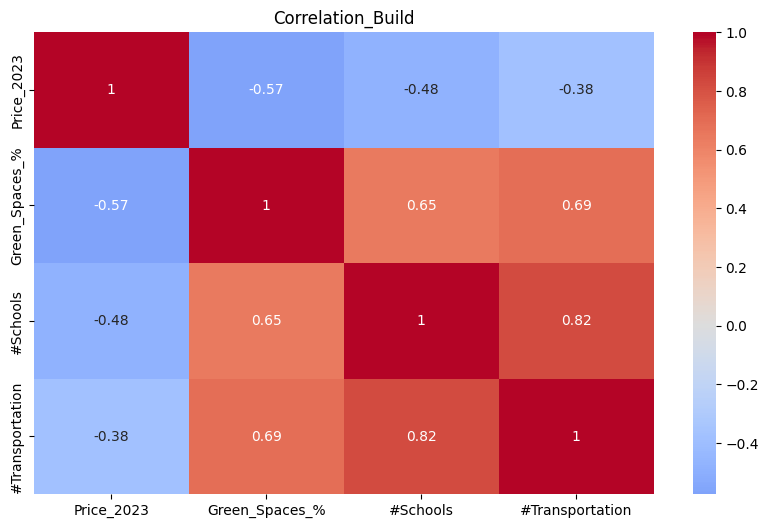

In [24]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_build, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation_Build')
plt.show()

Descriptive Statistics for Tables

In [25]:
summary_sweden = sweden_data.describe()
# Drop the row labeled 'count'
summary_sweden = summary_sweden.drop(index='count')
print(summary_sweden)

       Procent  Inflation           GDP
mean  1.032115   1.995614  4.232770e+06
std   1.435168   2.528175  9.541960e+05
min  -0.500000  -0.491667  2.927141e+06
25%  -0.120690   0.475000  3.471710e+06
50%   0.635057   1.358333  3.963683e+06
75%   1.747115   2.195833  4.906636e+06
max   4.080153   8.650000  6.206034e+06


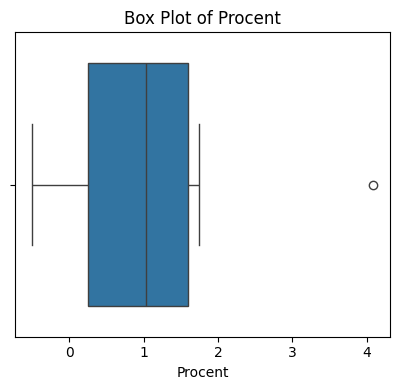

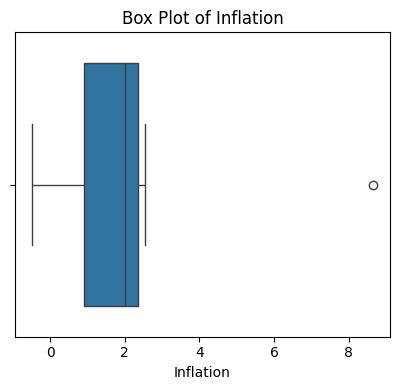

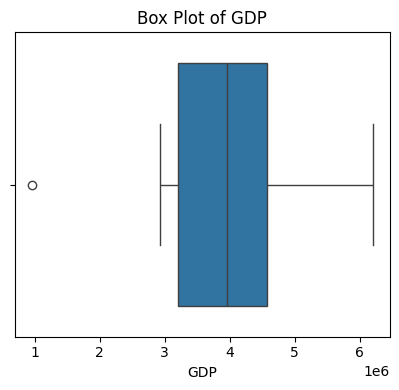

In [26]:
# Plot box plots for each numerical column
for column in summary_sweden.columns:
    plt.figure(figsize=(8, 4))

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=summary_sweden[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

In [27]:
summary_stockholm = stockholm_data.describe()
# Drop the row labeled 'count'
summary_stockholm = summary_stockholm.drop(index='count')
print(summary_stockholm)

              Price     #Habitants         Income  Unemployment     Education  \
mean   52468.596491   77813.857143  406612.994128     10.026998  27748.824074   
std    24971.850678   26869.188822  107695.428043      3.593102  11012.081503   
min    11163.000000    8968.000000  259077.777778      4.762500   3946.000000   
25%    33977.750000   68581.250000  316188.888889      7.248611  20426.750000   
50%    48166.000000   77901.500000  383981.250000      8.762500  28645.000000   
75%    65949.500000   92604.750000  457469.318182     13.058929  32296.250000   
max   116557.000000  128057.000000  820937.500000     20.022222  53606.000000   

      Apartments  Affordability_Index  
mean  191.773810             0.145060  
std   159.389393             0.036170  
min    11.000000             0.073843  
25%    36.000000             0.117165  
50%   180.500000             0.143125  
75%   283.500000             0.168688  
max   549.000000             0.236954  


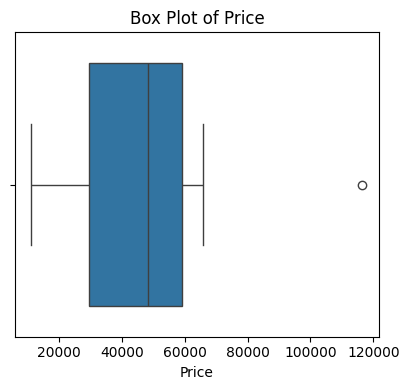

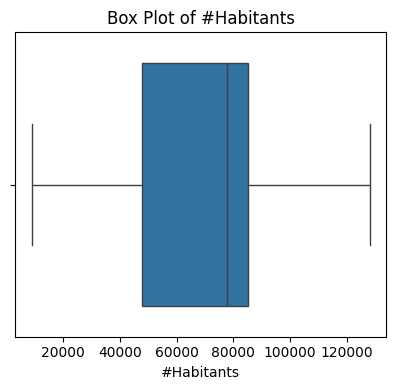

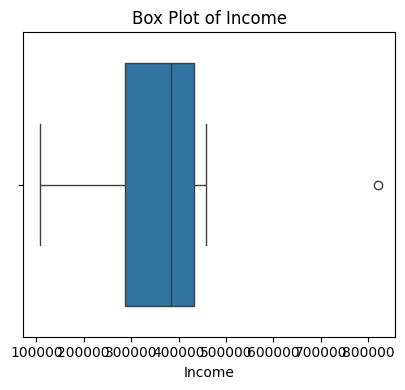

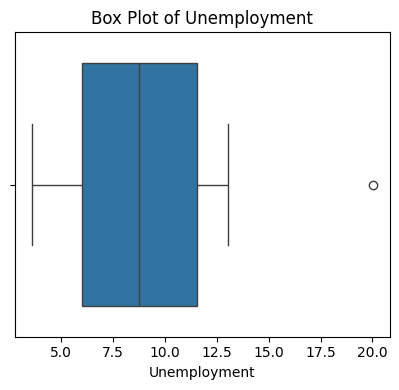

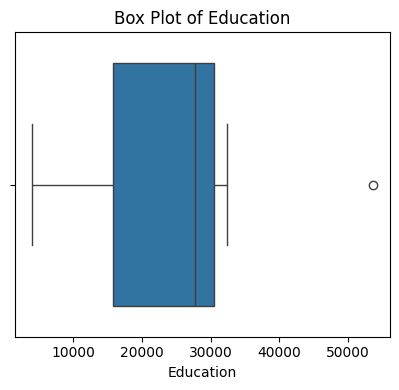

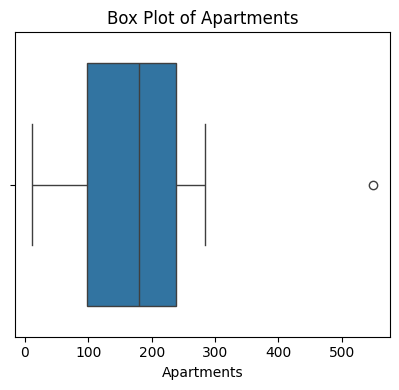

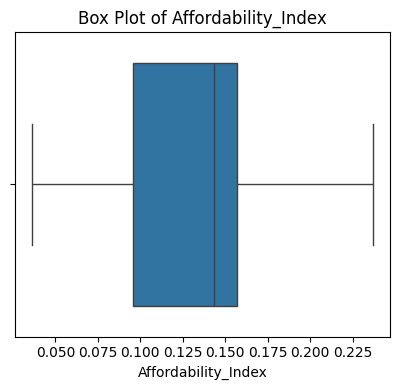

In [28]:
# Plot box plots for each numerical column
for column in summary_stockholm.columns:
    plt.figure(figsize=(8, 4))

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=summary_stockholm[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

Create Summary Statistics for each region

In [29]:
# Group by 'region' and calculate summary statistics
region_summary = stockholm_data.drop('year', axis=1).groupby('region').describe()
# Drop the column labeled 'count'
print(region_summary)

#Export table to .csv
region_summary.to_excel('region_summary.xlsx')

                      Price                                                \
                      count          mean           std      min      25%   
region                                                                      
Bromma-Västerled       19.0  45387.578947  13506.841494  23326.0  33098.0   
Brännkyrka-Skärholmen  19.0  34852.684211  12379.170759  15536.0  23673.0   
Enskede-Skarpnäck      19.0  45298.315789  15384.386392  20562.0  31567.0   
Essingen               19.0  62495.263158  17747.950175  33086.0  47443.5   
Farsta-Vantör          19.0  34172.315789  12516.596884  15045.0  22098.0   
Hägersten-Liljeholmen  19.0  51696.210526  17749.504029  23700.0  35593.0   
Hässelby-Vällingby     19.0  31125.736842  10786.744570  15933.0  21222.5   
Kungsholmen            19.0  71626.789474  21088.293300  37897.0  53472.5   
Spånga-Kista           19.0  26308.736842   9063.250268  11163.0  18256.5   
Södermalm              19.0  69629.789474  21242.857973  36351.0  51230.5   

Affordability Index over years by Area - Heatmap

Filtered Data:
                   region  year  Price  #Habitants         Income  \
6   Brännkyrka-Skärholmen  2011  25526     80177.0  289807.142857   
7   Brännkyrka-Skärholmen  2012  25973     81762.0  300928.571429   
8   Brännkyrka-Skärholmen  2013  29143     83270.0  313207.142857   
9   Brännkyrka-Skärholmen  2014  34480     85002.0  335985.714286   
10  Brännkyrka-Skärholmen  2015  43325     86405.0  338550.000000   

    Unemployment  Education  Apartments  Affordability_Index  
6      13.364286        NaN       264.0             0.088079  
7      13.035714        NaN       246.0             0.086310  
8      14.169231        NaN       278.0             0.093047  
9      13.769231        NaN       278.0             0.102623  
10     12.878571    20378.0       305.0             0.127972  


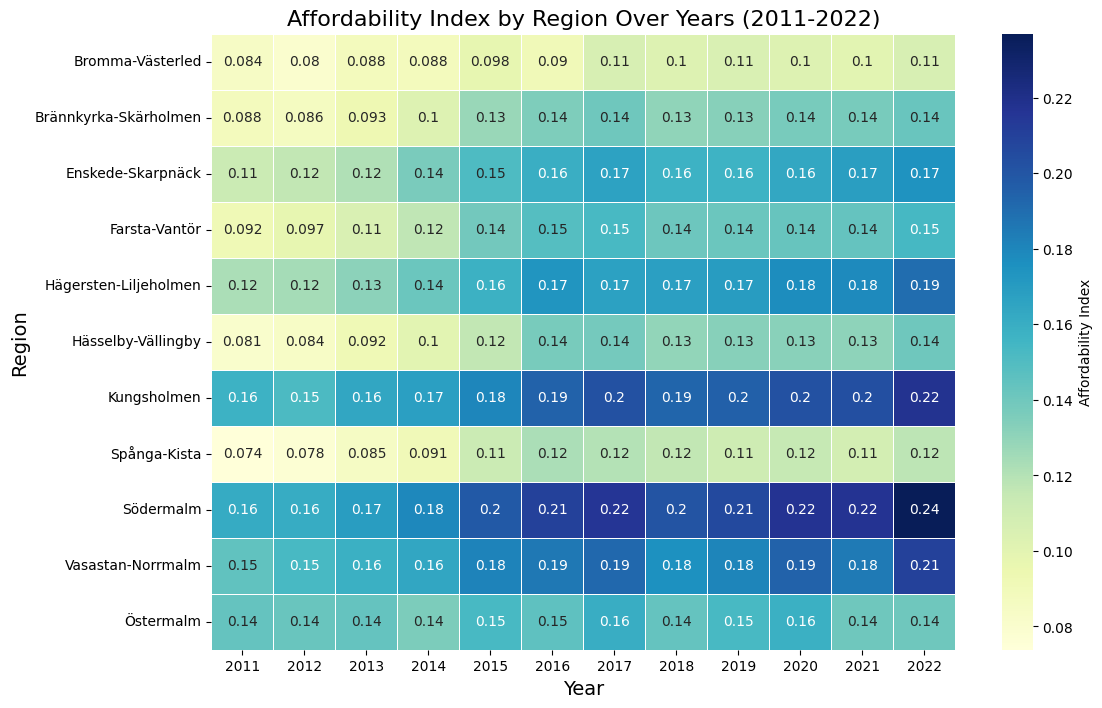

In [30]:
# Ensure the 'year' column is of type int
stockholm_data['year'] = stockholm_data['year'].astype(int)

# Define the region to exclude and the year range
region_to_exclude = 'Essingen'
year_range = list(range(2011, 2023))

# Filter the DataFrame to exclude the specified region and limit to the year range
filtered_data = stockholm_data[(stockholm_data['region'] != region_to_exclude) & (stockholm_data['year'].isin(year_range))]

# Debugging: Print the filtered data to check the contents
print("Filtered Data:")
print(filtered_data.head())

# Pivot the DataFrame
heatmap_data = filtered_data.pivot(index='region', columns='year', values='Affordability_Index')

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Affordability Index'})

# Customize the plot
plt.title('Affordability Index by Region Over Years (2011-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Region', fontsize=14)

# Show the plot
plt.show()

Cluster regions from Stockholm Table 

In [31]:
# Dropping rows with NaN vlaues in Stockohlm Table 
stockholm_data.dropna(axis=0, inplace=True)
print(stockholm_data)

                    region  year   Price  #Habitants         Income  \
10   Brännkyrka-Skärholmen  2015   43325     86405.0  338550.000000   
11   Brännkyrka-Skärholmen  2016   46105     87821.0  340850.000000   
12   Brännkyrka-Skärholmen  2017   48244     89268.0  343928.571429   
13   Brännkyrka-Skärholmen  2018   44399     91801.0  341450.000000   
14   Brännkyrka-Skärholmen  2019   44773     93386.0  337035.714286   
..                     ...   ...     ...         ...            ...   
221      Vasastan-Norrmalm  2017   98713     71227.0  513637.500000   
222      Vasastan-Norrmalm  2018   93168     72090.0  530622.222222   
223      Vasastan-Norrmalm  2019   95579     73653.0  529544.444444   
224      Vasastan-Norrmalm  2020  102700     74061.0  528422.222222   
225      Vasastan-Norrmalm  2021  113836     74119.0  616033.333333   

     Unemployment  Education  Apartments  Affordability_Index  
10      12.878571    20378.0       305.0             0.127972  
11      12.392857  

In [32]:
# DataFrame with region names and IDs
data_names = pd.DataFrame({
    'region': ['Södermalm', 'Essingen', 'Kungsholmen', 'Vasastan-Norrmalm', 'Östermalm', 'Bromma-Västerled', 'Brännkyrka-Skärholmen', 
               'Hägersten-Liljeholmen', 'Enskede-Skarpnäck', 'Farsta-Vantör', 'Hässelby-Vällingby', 'Spånga-Kista'],
    'region_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
})

# Merge Stockholm_data with data_names on 'region'
stockholm_id = pd.merge(stockholm_data, data_names, on='region', how='left')

print(stockholm_id)

                   region  year   Price  #Habitants         Income  \
0   Brännkyrka-Skärholmen  2015   43325     86405.0  338550.000000   
1   Brännkyrka-Skärholmen  2016   46105     87821.0  340850.000000   
2   Brännkyrka-Skärholmen  2017   48244     89268.0  343928.571429   
3   Brännkyrka-Skärholmen  2018   44399     91801.0  341450.000000   
4   Brännkyrka-Skärholmen  2019   44773     93386.0  337035.714286   
..                    ...   ...     ...         ...            ...   
79      Vasastan-Norrmalm  2017   98713     71227.0  513637.500000   
80      Vasastan-Norrmalm  2018   93168     72090.0  530622.222222   
81      Vasastan-Norrmalm  2019   95579     73653.0  529544.444444   
82      Vasastan-Norrmalm  2020  102700     74061.0  528422.222222   
83      Vasastan-Norrmalm  2021  113836     74119.0  616033.333333   

    Unemployment  Education  Apartments  Affordability_Index  region_id  
0      12.878571    20378.0       305.0             0.127972          7  
1      12.3

In [33]:
#Drop 'region' for clustering
stockholm_id.drop(columns=['region'], inplace=True)

print(stockholm_id)

    year   Price  #Habitants         Income  Unemployment  Education  \
0   2015   43325     86405.0  338550.000000     12.878571    20378.0   
1   2016   46105     87821.0  340850.000000     12.392857    21986.0   
2   2017   48244     89268.0  343928.571429     12.678571    22888.0   
3   2018   44399     91801.0  341450.000000     13.128571    22962.0   
4   2019   44773     93386.0  337035.714286     12.685714    25042.0   
..   ...     ...         ...            ...           ...        ...   
79  2017   98713     71227.0  513637.500000      6.085714    30535.0   
80  2018   93168     72090.0  530622.222222      5.675000    30927.0   
81  2019   95579     73653.0  529544.444444      5.844444    31701.0   
82  2020  102700     74061.0  528422.222222      9.285714    32244.0   
83  2021  113836     74119.0  616033.333333      8.342857    31718.0   

    Apartments  Affordability_Index  region_id  
0        305.0             0.127972          7  
1        299.0             0.135265  

Creating Silhouette curve to find how many clusters are optimal

For n_clusters = 2, the silhouette score is 0.44149006599038126
For n_clusters = 3, the silhouette score is 0.5073259188778703
For n_clusters = 4, the silhouette score is 0.5310382790519017
For n_clusters = 5, the silhouette score is 0.5553671851140054
For n_clusters = 6, the silhouette score is 0.501146100988913
For n_clusters = 7, the silhouette score is 0.4962537869475695
For n_clusters = 8, the silhouette score is 0.4989355304990775
For n_clusters = 9, the silhouette score is 0.48291194356463696
For n_clusters = 10, the silhouette score is 0.4959552715241109


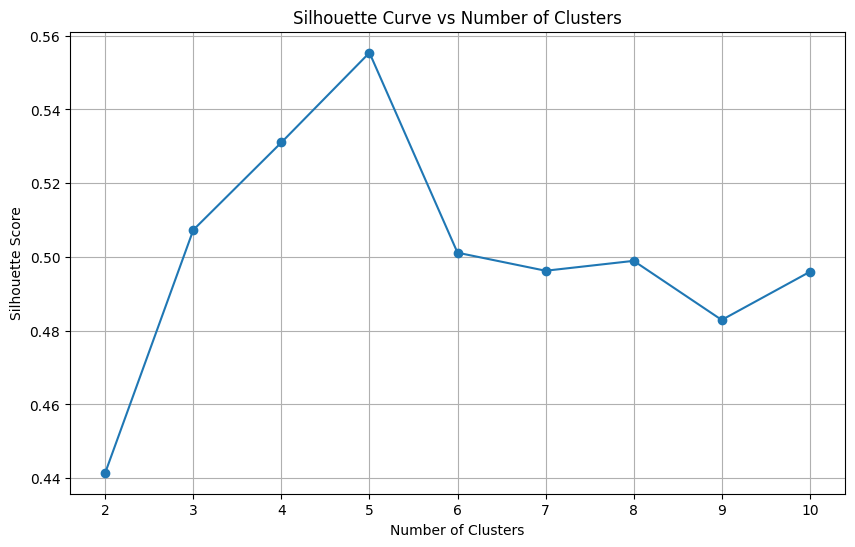

In [34]:
from sklearn.metrics import silhouette_score

# Choosing columns for clustering
data = stockholm_id[['Income', 'Unemployment', 'Education']]

# Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Range of clusters to evaluate
range_n_clusters = list(range(2, 11))

# List to store the silhouette scores
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_data)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(normalized_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Curve vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

In [35]:
# DataFrame to store clustered results
clustered_data = pd.DataFrame()

# Perform clustering for each year
for year in stockholm_id['year'].unique():
    # Filter data for the current year
    year_data = stockholm_id[stockholm_id['year'] == year].copy()
    
    # Select features for clustering
    features_for_clustering = year_data[['Income', 'Unemployment', 'Education']]
    
    # Standardize data if needed for clustering algorithms
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(features_for_clustering)
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    year_data['Cluster'] = kmeans.fit_predict(scaled_data)
    
    # Append clustered data to results DataFrame
    clustered_data = pd.concat([clustered_data, year_data], ignore_index=True)

# Giving back region names 
clustered_data = pd.merge(clustered_data, data_names, on='region_id', how='left')

print(clustered_data)

# Save table with cluster id
clustered_data.to_csv('Clusters_Stockholm.csv')

    year   Price  #Habitants         Income  Unemployment  Education  \
0   2015   43325     86405.0  338550.000000     12.878571    20378.0   
1   2015   52526     76276.0  536377.272727      6.780000    26345.0   
2   2015   54204     95541.0  358578.571429     10.207143    32453.0   
3   2015   71702      9324.0  447650.000000      6.750000     3946.0   
4   2015   42664     98247.0  307293.333333     13.753333    24553.0   
..   ...     ...         ...            ...           ...        ...   
79  2021   99696     61631.0  489400.000000      8.380000    28047.0   
80  2021  112115     83260.0  798012.500000      6.575000    33886.0   
81  2021   99161    127353.0  457827.272727      9.700000    51657.0   
82  2021   35491     91340.0  326844.444444     20.022222    19215.0   
83  2021  113836     74119.0  616033.333333      8.342857    31718.0   

    Apartments  Affordability_Index  region_id  Cluster                 region  
0        305.0             0.127972          7        

In [36]:
# Plotly scatter plot
fig = px.scatter(clustered_data, x='Income', y='Unemployment', color='Cluster', animation_frame='year', hover_name='region', text ='region',
                 title='Clustering of Stockholm Data over Time')
fig.update_layout(title_x=0.5)

fig.update_layout(
    title_x=0.5,
    autosize=False,
    width=800,
    height=800,  # Make the plot square
    plot_bgcolor='white',  # Set background color to white
    paper_bgcolor='white',  # Set the surrounding paper color to white
)

# Show the plot
fig.show()

# Export chart
fig.write_html("Charts from Python/Clustering of Stockholm Data over Time.html")


Price Over time by CLusters

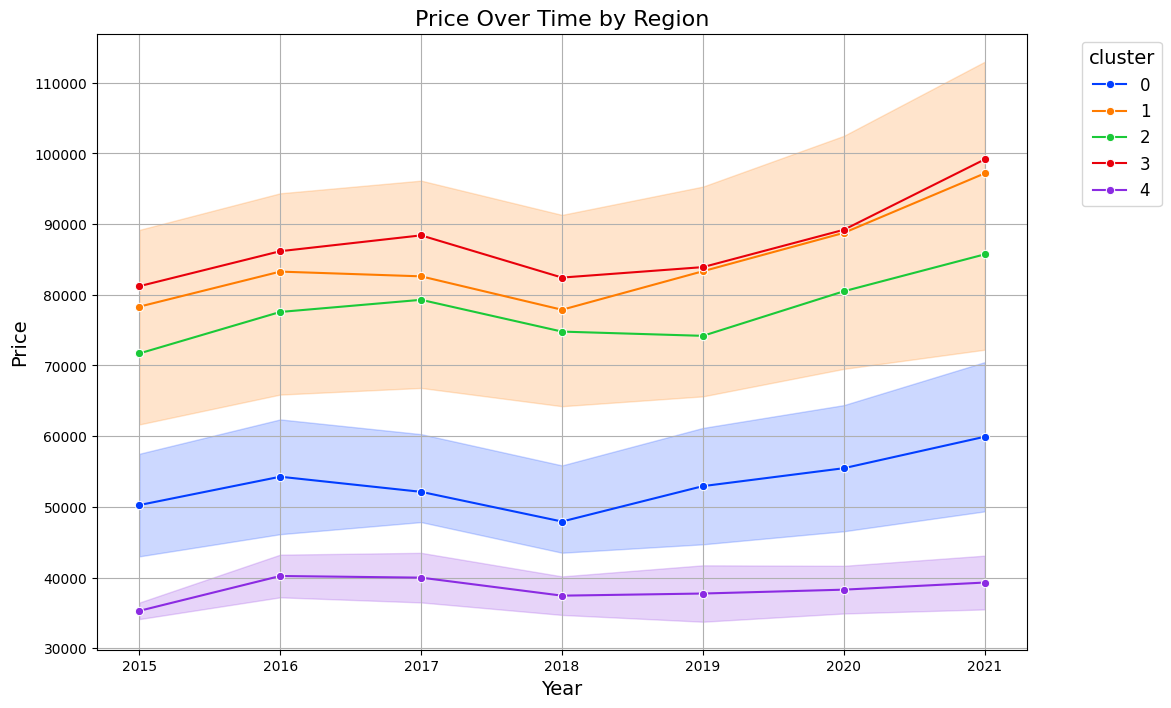

In [37]:
# Create the line plot
plt.figure(figsize=(12, 8)) 
sns.lineplot(data=clustered_data, x='year', y='Price', hue='Cluster', marker='o', palette='bright')

# Customize the plot
plt.title('Price Over Time by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='cluster', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  

# Show the plot
plt.show()

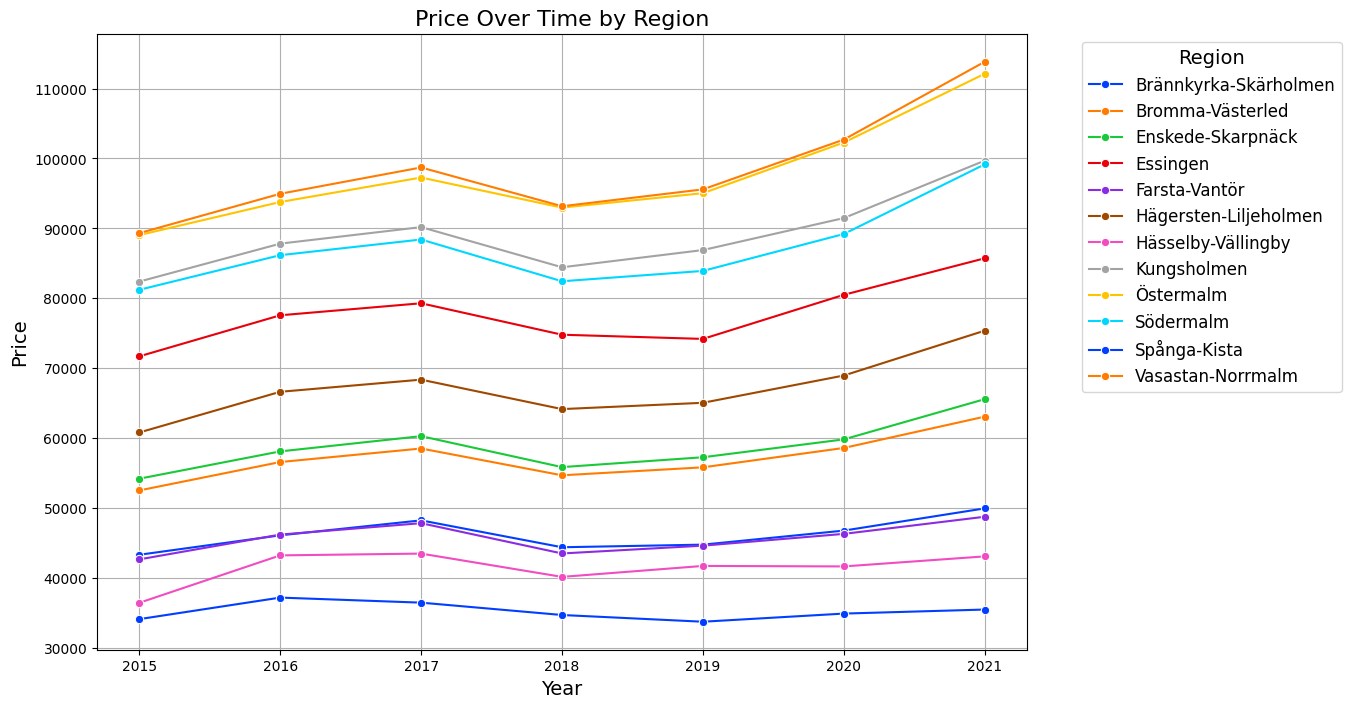

In [38]:
# Create the line plot
plt.figure(figsize=(12, 8)) 
sns.lineplot(data=stockholm_data, x='year', y='Price', hue='region', marker='o', palette='bright')

# Customize the plot
plt.title('Price Over Time by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='Region', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  

# Show the plot
plt.show()

Scatter Plot to vizualize relation between Price and New Apartments (Apartments)

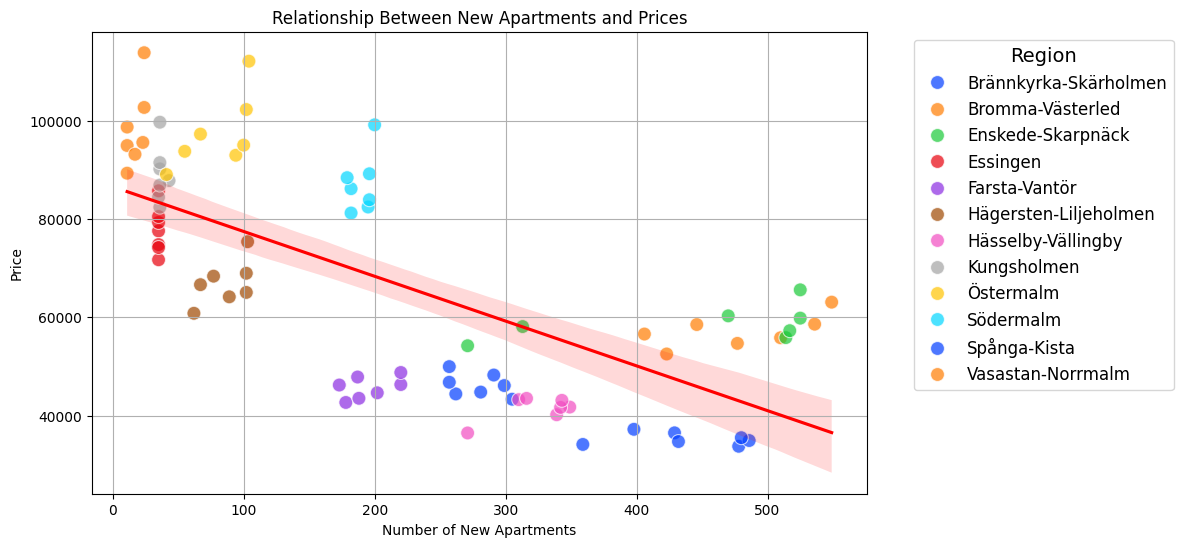

In [39]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Apartments', y='Price', hue='region', data=stockholm_data, palette='bright', s=100, alpha=0.7)

# Add the overall regression line
sns.regplot(x='Apartments', y='Price', data=stockholm_data, scatter=False, color='red')
plt.legend(title='Region', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Relationship Between New Apartments and Prices')
plt.xlabel('Number of New Apartments')
plt.ylabel('Price')
plt.grid(True)
plt.show()